In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, BayesianRidge, HuberRegressor, SGDRegressor, LinearRegression
from sklearn.metrics import r2_score

In [284]:
ruta = 'media_data.xlsx'
df = pd.read_excel(ruta)

In [285]:
df.head()

,Date,session_source,channel,full_campaign_name,campaign,cost,impressions,clicks,video_100_platform,revenue_GA4,sessions_GA4,transactions_GA4,ROAS_GA4
0,2023-11-01,google ads,Pmax,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,142.627381,117505,2991,0.0,2411.515230,2330.0,53.0,16.907800
1,2023-11-01,google ads,Pmax,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,113.861826,25326,725,0.0,10112.215398,2890.0,122.0,88.811288
2,2023-11-01,google ads,Search,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,26.100671,1919,1084,0.0,343.408085,770.0,7.0,13.157059
3,2023-11-01,google ads,Search,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,47.238423,2818,241,0.0,71.241820,217.0,2.0,1.508133
4,2023-11-01,google ads,Search,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,87.349721,9496,729,0.0,273.563777,564.0,3.0,3.131822


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13939 entries, 0 to 13938
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                13939 non-null  datetime64[ns]
 1   session_source      13939 non-null  object        
 2   channel             13939 non-null  object        
 3   full_campaign_name  13939 non-null  object        
 4   campaign            13939 non-null  object        
 5   cost                13939 non-null  float64       
 6   impressions         13939 non-null  int64         
 7   clicks              13939 non-null  int64         
 8   video_100_platform  13749 non-null  float64       
 9   revenue_GA4         9258 non-null   float64       
 10  sessions_GA4        9258 non-null   float64       
 11  transactions_GA4    9258 non-null   float64       
 12  ROAS_GA4            9258 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), ob

In [287]:
df_limpia = df.dropna(subset=['revenue_GA4'])
df_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9258 entries, 0 to 13935
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                9258 non-null   datetime64[ns]
 1   session_source      9258 non-null   object        
 2   channel             9258 non-null   object        
 3   full_campaign_name  9258 non-null   object        
 4   campaign            9258 non-null   object        
 5   cost                9258 non-null   float64       
 6   impressions         9258 non-null   int64         
 7   clicks              9258 non-null   int64         
 8   video_100_platform  9258 non-null   float64       
 9   revenue_GA4         9258 non-null   float64       
 10  sessions_GA4        9258 non-null   float64       
 11  transactions_GA4    9258 non-null   float64       
 12  ROAS_GA4            9258 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4

In [288]:
indice_maximo = df_limpia["ROAS_GA4"].idxmax()
df_limpia.drop(indice_maximo, inplace=True)
df_limpia = df_limpia.drop('Date', axis=1)
df_limpia = df_limpia.drop('full_campaign_name', axis=1)

C:\Users\juano\AppData\Local\Temp\ipykernel_3736\2801054515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpia.drop(indice_maximo, inplace=True)


In [289]:
df_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9257 entries, 0 to 13935
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   session_source      9257 non-null   object 
 1   channel             9257 non-null   object 
 2   campaign            9257 non-null   object 
 3   cost                9257 non-null   float64
 4   impressions         9257 non-null   int64  
 5   clicks              9257 non-null   int64  
 6   video_100_platform  9257 non-null   float64
 7   revenue_GA4         9257 non-null   float64
 8   sessions_GA4        9257 non-null   float64
 9   transactions_GA4    9257 non-null   float64
 10  ROAS_GA4            9257 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 867.8+ KB


In [290]:
data_encoded = pd.get_dummies(df_limpia, columns=['campaign', 'channel', 'session_source'])

In [291]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9257 entries, 0 to 13935
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cost                       9257 non-null   float64
 1   impressions                9257 non-null   int64  
 2   clicks                     9257 non-null   int64  
 3   video_100_platform         9257 non-null   float64
 4   revenue_GA4                9257 non-null   float64
 5   sessions_GA4               9257 non-null   float64
 6   transactions_GA4           9257 non-null   float64
 7   ROAS_GA4                   9257 non-null   float64
 8   campaign_Always On         9257 non-null   bool   
 9   campaign_Buenfin           9257 non-null   bool   
 10  campaign_E-Commerce        9257 non-null   bool   
 11  campaign_Hotsale           9257 non-null   bool   
 12  campaign_Liveshopping      9257 non-null   bool   
 13  channel_App                9257 non-null   bool   
 

In [292]:
y = data_encoded['ROAS_GA4']
X = data_encoded.drop('ROAS_GA4', axis=1)

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [294]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

In [295]:
models = {
    "Ridge": Ridge(),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "SGDRegressor": SGDRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "LinealRegression": LinearRegression()
}

In [296]:
model_results = {}
for model_name, model in models.items():
    reg_pipeline = Pipeline([
        ("scalar", StandardScaler()),
        ("numerical_imputer", SimpleImputer(strategy='mean')),
        ("model", model)])
    reg_pipeline.fit(X_train, y_train)
    model_results[model_name] = reg_pipeline

In [297]:
test_scores = {}
for model_name, model in model_results.items():
    y_pred = model.predict(X_test)
    test_scores[model_name] = r2_score(y_test, y_pred)
    results = pd.DataFrame(list(test_scores.items()), columns=['Modelo', 'Puntaje R^2'])
    results.set_index('Modelo', inplace=True)
display(results)

,Puntaje R^2
Modelo,
Ridge,-0.006405
BayesianRidge,0.004886
HuberRegressor,0.000860
SGDRegressor,-0.098352
RandomForestRegressor,0.631464
LinealRegression,-0.007204


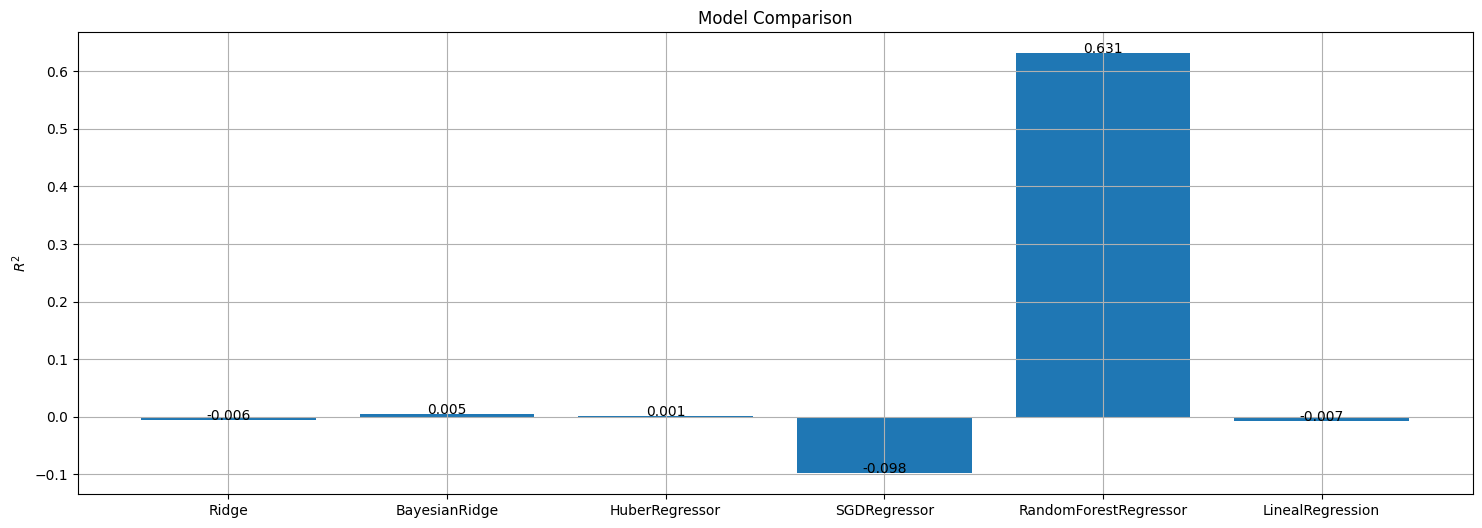

In [298]:
plt.figure(figsize=(18, 6))
bars = plt.bar(test_scores.keys(), test_scores.values())
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center')
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()
plt.show()